## Name: Alok Kumar Singh

### Predicting Rate Of Sales 

#### Problem Statement
how you would approach a problem focused on predicting the rate of sale for a given product at the size level. A sample dataset has been provided for you to explore and potentially produce a working prototype.


The dataset provided consists of a selection of product attributes along with some high level sales data. The columns are defined as follows:
- ProductNumber: Unique ID of the product
- ProductSkuCode: Unique ID of the product along with the size code
- ProductSize: Size of the product
- ProductDivision: Numerical encoding of the product's division
- ProductDepartment: Numerical encoding of the product's department
- ProductGroup: Numerical encoding of the product's group
- ProductCategory: Numerical encoding of the product's category
- ProductSizeGroupDescription: Numerical encoding of the product's size group description
- ProductOriginalUnitPriceGBP: Price of the product in GBP
- ProductMaxDaysToSellinFullPrice: The maximum number of days the product was sold at full price
- Season: Numerical encoding of the season the product was sold in
- FullPriceUnits: Number of full price units sold
- RateofSales: The rate of the sale of the product at the size level


#### Assumptions Made
1) Number of days can never be negative      
2) Price of an item can never be negative       
3) Converting the -1 value of ProductMaxDaysToSellInFullPrice to 1 and droping the other negative values.

In [1]:
# Importing Packages
import pandas as pd
from category_encoders import BinaryEncoder
import seaborn as sns
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the Data Set
df_product_original = pd.read_csv('dataset.csv')

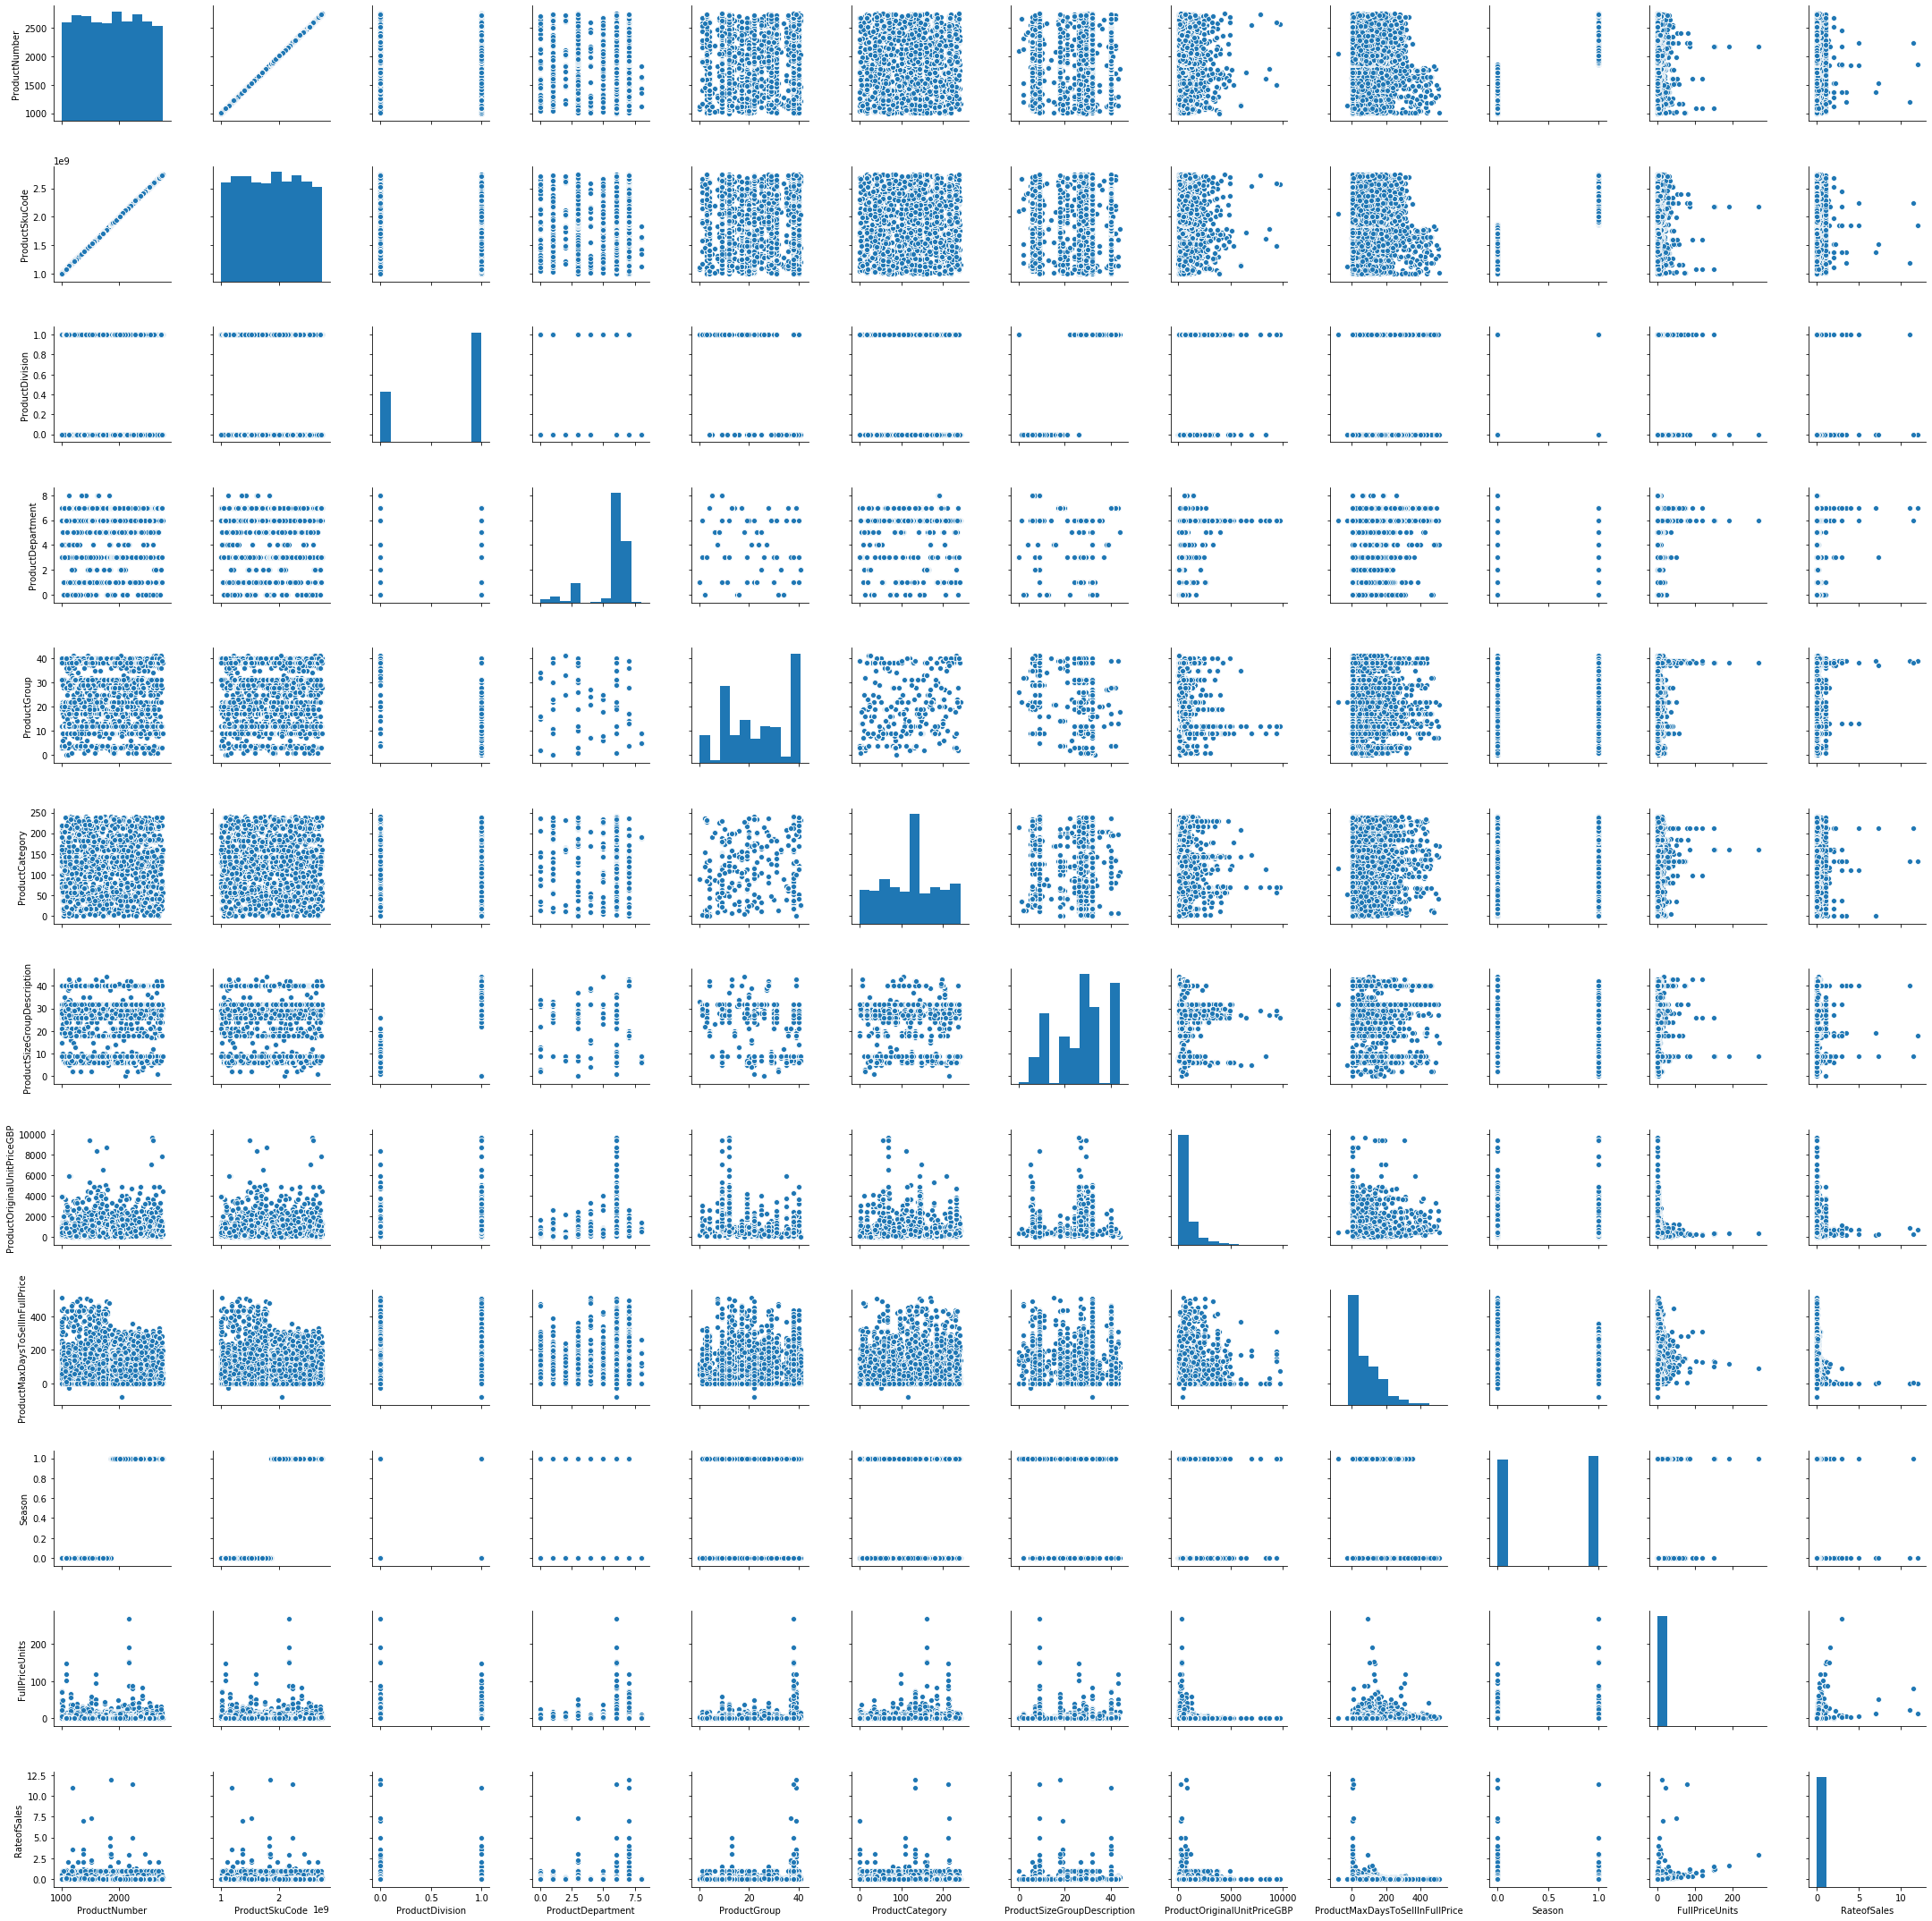

In [3]:
sns.pairplot(df_product_original)

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python. As we can see from the above plots that their is a linear relationship between ProductNumber and ProductSkuCode. We can also see that their is very strong co relation between ProductDivision and all the other features which we will verify by calculating the $VIF(Variation Inflation Factor)$. If we consider RateofSales then we can see that their is some variance in data.

<Figure size 50000x60000 with 0 Axes>

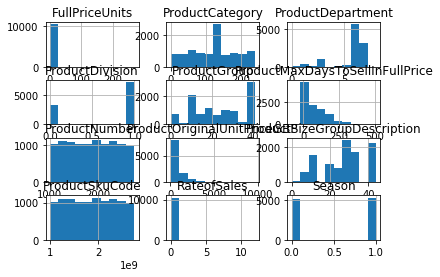

In [4]:
figure(num=None, figsize=(500, 600), dpi=100, facecolor='w', edgecolor='k')
df_product_original.hist()
pyplot.show()

With histogram plot we can decide about the normality of the dataset, and from the above histogram plot we can see that the data is not normally distributed. ProductSizeGroupDescription is left skewed and ProductDepartment is right skewed.

In [5]:
#sns.regplot(x="FullPriceUnits", y="RateofSales", data=df_product_original, fit_reg=False)

In [6]:
#sns.regplot(x="ProductMaxDaysToSellInFullPrice", y="RateofSales", data=df_product_original, fit_reg=False)

In [7]:
# Making a copy of data set
df_product =df_product_original.copy()
# we usually don't make changes to our original data set

Printing the first five rows of the data set to get familiarised with it.

In [8]:
df_product.head(5)

,ProductNumber,ProductSkuCode,ProductSize,ProductDivision,ProductDepartment,ProductGroup,ProductCategory,ProductSizeGroupDescription,ProductOriginalUnitPriceGBP,ProductMaxDaysToSellInFullPrice,Season,FullPriceUnits,RateofSales
0,1000,1000000005,8 UK,1,6,12,69,29,3913.0,1.0,0,0,0.000000
1,1001,1001000009,44 FR,1,6,19,217,26,1085.0,1.0,0,0,0.000000
2,1002,1002000007,XL,1,3,3,84,32,105.0,164.0,0,1,0.006098
3,1003,1003000004,38 IT,1,6,31,152,27,637.0,1.0,0,0,0.000000
4,1003,1003000006,42 IT,1,6,31,152,27,637.0,129.0,0,2,0.015504


In [9]:
df_product.describe()

,ProductNumber,ProductSkuCode,ProductDivision,ProductDepartment,ProductGroup,ProductCategory,ProductSizeGroupDescription,ProductOriginalUnitPriceGBP,ProductMaxDaysToSellInFullPrice,Season,FullPriceUnits,RateofSales
count,10528.000000,1.052800e+04,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000,10528.000000
mean,1868.399791,1.868400e+09,0.685315,5.721125,23.541318,123.593275,25.965616,877.528501,78.165938,0.509024,2.424012,0.059311
std,501.845081,5.018451e+08,0.464412,1.587725,12.062706,63.215023,11.113650,879.284932,90.000596,0.499942,6.408731,0.286553
min,1000.000000,1.000000e+09,0.000000,0.000000,0.000000,0.000000,0.000000,25.200000,-81.000000,0.000000,0.000000,0.000000
25%,1428.000000,1.428000e+09,0.000000,6.000000,12.000000,71.000000,18.000000,385.000000,1.000000,0.000000,0.000000,0.000000
50%,1878.500000,1.878500e+09,1.000000,6.000000,22.000000,132.000000,28.000000,665.000000,52.000000,1.000000,1.000000,0.013841
75%,2303.000000,2.303000e+09,1.000000,7.000000,38.000000,171.000000,32.000000,980.000000,129.000000,1.000000,3.000000,0.037838
max,2749.000000,2.749000e+09,1.000000,8.000000,41.000000,241.000000,44.000000,9688.000000,509.000000,1.000000,268.000000,12.000000


Applying describe on the data set to understand the data set statisticaly. From the above information we can see that minimum value for ProductMaxDaysToSellInFullPrice is -81 and according to our assumption mentioned above we can not have negative days of selling any product. Other than this everything seems good.

In [10]:
df_product.shape

(10528, 13)

In [11]:
df_product.dtypes

ProductNumber                        int64
ProductSkuCode                       int64
ProductSize                         object
ProductDivision                      int64
ProductDepartment                    int64
ProductGroup                         int64
ProductCategory                      int64
ProductSizeGroupDescription          int64
ProductOriginalUnitPriceGBP        float64
ProductMaxDaysToSellInFullPrice    float64
Season                               int64
FullPriceUnits                       int64
RateofSales                        float64
dtype: object

In [12]:
# Checking Null Values in our data set
df_product.isnull().sum()

ProductNumber                      0
ProductSkuCode                     0
ProductSize                        0
ProductDivision                    0
ProductDepartment                  0
ProductGroup                       0
ProductCategory                    0
ProductSizeGroupDescription        0
ProductOriginalUnitPriceGBP        0
ProductMaxDaysToSellInFullPrice    0
Season                             0
FullPriceUnits                     0
RateofSales                        0
dtype: int64

In [13]:
# Checking For Duplicate Values in our data set
df_product.duplicated().sum()

0

In [14]:
# Checking for number of unique Values in Product Number Column
df_product['ProductNumber'].nunique()

1750

Their are total 1750 unique items in the data set 

In [15]:
# Checking for number of unique Values in Product Size Column
df_product['ProductSize'].nunique()

248

we can see that type of $ProductSize$ is object so we have to change it to either float or integer since ML algorithms
only work with numerical values.Their are encoding methods that we can use:  
$1) Label Encoder:$ This encoder will perfom the encoding of our categories based on the popularity of the item in the data set. Drawback of using this encoder is that it will create a order based encoding which will create problems in efficiency of our models.  
$2) One Hot Encoder:$ This encoder will create the as many feature as total number of categories. we can see that unique item in ProductSize is 248, so $one Hot Encoder$ will create 248 features in the data set so we will not use this encoder as well.  
$3) Binary Encoder:$ This encoder will create only 8 features, it takes advantage of the binary system and so there will be multiple ones in a row.

#### Performing the Data Cleanup

In [16]:
# Checking for wrong Data in ProductOriginalUnitPriceGBP to see if their is any negative values,
#since as per our assumption price of any item can never be negative
count = 0 
for x in df_product.index:
    if df_product.loc[x, "ProductOriginalUnitPriceGBP"] < 0:
        count = count + 1
print("Total negative values in the column ProductOriginalUnitPriceGBP:  ",count) 

Total negative values in the column ProductOriginalUnitPriceGBP:   0


In [17]:
# Checking for wrong Data in ProductMaxDaysToSellInFullPrice to see if their is any negative values,
#since as per or assumption days of any item can never be negative
count = 0 
for x in df_product.index:
    if df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] < 0:
        count = count + 1
print("Total Negative Values in the column ProductMaxDaysToSellInFullPrice: ",count) 

Total Negative Values in the column ProductMaxDaysToSellInFullPrice:  10


In [18]:
# Checking for wrong Data in FullPriceUnits to see if their is any negative values
count = 0 
for x in df_product.index:
    if df_product.loc[x, "FullPriceUnits"] < 0:
        count = count + 1
print("Total Negative Values in the column FullPriceUnits: ",count) 

Total Negative Values in the column FullPriceUnits:  0


From the above cells we can see that only ProductMaxDaysToSellInFullPrice has 10 negative values. We will first try to analyse the data and decide what we can do with it. If we can impute the values then we will first try to impute it otherwise we will drop the rows

In [19]:
df_product.query('ProductMaxDaysToSellInFullPrice <0')

,ProductNumber,ProductSkuCode,ProductSize,ProductDivision,ProductDepartment,ProductGroup,ProductCategory,ProductSizeGroupDescription,ProductOriginalUnitPriceGBP,ProductMaxDaysToSellInFullPrice,Season,FullPriceUnits,RateofSales
309,1128,1128000009,46 UK/US,0,6,22,51,5,504.0,-26.0,0,0,0.0
328,1128,1128000011,50 UK/US,0,6,22,51,5,504.0,-26.0,0,0,0.0
329,1128,1128000012,52 UK/US,0,6,22,51,5,504.0,-26.0,0,0,0.0
2168,1628,1628000007,40 FR,0,6,9,230,26,3339.0,-1.0,0,0,0.0
2508,1128,1128000010,48 UK/US,0,6,22,51,5,504.0,-26.0,0,0,0.0
2754,1628,1628000008,42 FR,0,6,9,230,26,3339.0,-1.0,0,0,0.0
5670,2049,2049000004,S,1,6,22,115,32,420.0,-81.0,1,0,0.0
7467,2049,2049000005,M,1,6,22,115,32,420.0,-81.0,1,0,0.0
9748,2049,2049000003,XS,1,6,22,115,32,420.0,-81.0,1,0,0.0
9749,2049,2049000006,L,1,6,22,115,32,420.0,-81.0,1,0,0.0


As we can see that their are 10 rows with negative values in $ProductMaxDaysToSellInFullPrice$ column and all are from the same department which is 6 and product group is also almost same for all the products so we should not just simply drop all the rows. We will try to impute the values for these rows, as we can see that their are two values as -1, I think this could be changed to 1, other then that 26 and 81 we exactly don't know what to do so we will drop these rows. we will drop total 8 rows.

In [20]:
# Imputing the values in the data set and droping the rows with wrong values from the data set
count = 0 
for x in df_product.index:
    if df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] < 0 and df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] ==-1:
        df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] = 1.0
    elif df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] < 0 and df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] !=-1:
        df_product.drop(x, inplace = True)

# After imputing and deleting the negative values
count = 0 
for x in df_product.index:
    if df_product.loc[x, "ProductMaxDaysToSellInFullPrice"] < 0:
        count = count + 1
print("Total Negative Values in the column ProductMaxDaysToSellInFullPrice after imputation: ",count) 


Total Negative Values in the column ProductMaxDaysToSellInFullPrice after imputation:  0


In [21]:
df_product.shape

(10520, 13)

In [22]:
# Checking correlation between the features
corr = df_product.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ProductNumber,ProductSkuCode,ProductDivision,ProductDepartment,ProductGroup,ProductCategory,ProductSizeGroupDescription,ProductOriginalUnitPriceGBP,ProductMaxDaysToSellInFullPrice,Season,FullPriceUnits,RateofSales
ProductNumber,1,1,0.0016,-0.083,0.029,0.058,-0.032,0.00061,0.08,0.87,0.034,-0.013
ProductSkuCode,1,1,0.0016,-0.083,0.029,0.058,-0.032,0.00061,0.08,0.87,0.034,-0.013
ProductDivision,0.0016,0.0016,1,-0.046,-0.31,-0.0055,0.87,0.17,0.023,-0.012,-0.0043,-0.027
ProductDepartment,-0.083,-0.083,-0.046,1,0.0085,-0.075,0.17,0.14,-0.082,-0.075,-0.066,0.00036
ProductGroup,0.029,0.029,-0.31,0.0085,1,0.17,-0.3,-0.28,-0.0014,0.043,0.085,0.058
ProductCategory,0.058,0.058,-0.0055,-0.075,0.17,1,-0.052,-0.076,0.045,0.065,0.054,0.0005
ProductSizeGroupDescription,-0.032,-0.032,0.87,0.17,-0.3,-0.052,1,0.051,0.032,-0.03,-0.011,-0.021
ProductOriginalUnitPriceGBP,0.00061,0.00061,0.17,0.14,-0.28,-0.076,0.051,1,-0.027,-0.042,-0.13,-0.035
ProductMaxDaysToSellInFullPrice,0.08,0.08,0.023,-0.082,-0.0014,0.045,0.032,-0.027,1,0.085,0.25,-0.086
Season,0.87,0.87,-0.012,-0.075,0.043,0.065,-0.03,-0.042,0.085,1,0.042,-0.02


One of the assumption to apply for regression model is that their should not be any correlation between the features because a key goal for regression analysis is to isolate the relationship between each independent variable and depnedent variable. The idea is that you can change the value of one independent variable and not the others. However, when independent variables are correlated, it indicates that changes in one variable are associated with shifts in another variable.

As we can see that their are colinearity between few of the features now we have two options   
1) we can drop one of the feature or,   
2) we can keep the column as it is in the data set and predict   

we will decide this based on VIF values.

Their are two types of independant variable one is $experimental variable$ and another is $control variable$. Experimental varibale are those variables which have direct relationship with the target and control variables are those which are just supporting variables for our experimental variables.   
In our case experimental variables are $ProductMaxDaysToSellInFullPrice$ and $FullPriceUnits$ since the formula for $Rate of sale : FullPriceUnits / ProductMaxDaysToSellinFullPrice$.

#### Spliting the data set in features and targets

Reason for spliting the data set in train and test is to test our model on real world data. We use train data for traing and test data for testing. We are spliting the data set before making any changes to the data set because we don't want any data leakage due to which model might cause overfiting. We will perform all the required operations on train set and then transform it to test set. we will make $RateofSales$ as our target and all other columns as features to predict RateofSales.

#### Binary encoding

We are using Binary Encoder to encode our column ProductSize.

In [23]:
# Spliting the data set into 70-30 
X = df_product.copy()
X.drop(['RateofSales'],inplace = True, axis = 1)
y = df_product.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Label Encoding for ProductSize column
be = BinaryEncoder(cols = ["ProductSize"])
new_df_product= be.fit_transform(X_train["ProductSize"])
X_train = pd.concat([X_train,new_df_product],axis = 1)
X_train.drop('ProductSize_0',inplace = True, axis = 1)

new_df_product_test = be.transform(X_test["ProductSize"])
X_test = pd.concat([X_test,new_df_product_test],axis = 1)
X_test.drop('ProductSize_0',inplace = True,axis = 1)

In [24]:
X_train.drop(['ProductSkuCode','ProductSize'],inplace = True, axis = 1)
X_test.drop(['ProductSkuCode','ProductSize'],inplace = True, axis = 1)

We are droping ProductSkuCode and ProductSize from our train and test data set. We droped ProductSize because we have already created the 8 other features from it using binary encoder. 

In [25]:
X_test_product_number = X_test["ProductNumber"]

#### Calculating VIF

In [26]:
vif_product = pd.DataFrame()
vif_product["features"]= X_train.columns
vif_product["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]

In [27]:
print(vif_product)

                           features        VIF
0                     ProductNumber  30.532276
1                   ProductDivision  18.482908
2                 ProductDepartment  17.477684
3                      ProductGroup   5.408915
4                   ProductCategory   4.760913
5       ProductSizeGroupDescription  37.476067
6       ProductOriginalUnitPriceGBP   2.546873
7   ProductMaxDaysToSellInFullPrice   1.873670
8                            Season   5.810533
9                    FullPriceUnits   1.233274
10                    ProductSize_1   1.051020
11                    ProductSize_2   1.332358
12                    ProductSize_3   1.748692
13                    ProductSize_4   1.921945
14                    ProductSize_5   1.897782
15                    ProductSize_6   2.054131
16                    ProductSize_7   2.226922
17                    ProductSize_8   2.044950


The $Variance Inflation Factor (VIF)$ quantifies the extent of correlation between one predictor and the other predictors in the model. It is used for diagnosing collinearity/multicolinearity. value of 1 is ok and value from 1-5 is moderate which will not cause any issue in our model creation, value more then that may cause issue if the predictors are directly related in predicting our target.
we can see that $ProductSizeGroupDescription$ is having very high VIF and considering that this is a descriotion of Product sizes group we can drop this column because it will not play any considerable role in predicting rate of sales. we will also drop ProductDivision and ProductDepartment.

In [28]:
X_train.drop(['ProductDivision','ProductDepartment','ProductSizeGroupDescription'],inplace = True, axis = 1)

In [29]:
vif_product = pd.DataFrame()
vif_product["features"]= X_train.columns
vif_product["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
print(vif_product)

                           features        VIF
0                     ProductNumber  21.399473
1                      ProductGroup   4.914678
2                   ProductCategory   4.678889
3       ProductOriginalUnitPriceGBP   2.216894
4   ProductMaxDaysToSellInFullPrice   1.853103
5                            Season   4.862493
6                    FullPriceUnits   1.230057
7                     ProductSize_1   1.040430
8                     ProductSize_2   1.304991
9                     ProductSize_3   1.719630
10                    ProductSize_4   1.883239
11                    ProductSize_5   1.871584
12                    ProductSize_6   1.936185
13                    ProductSize_7   2.188002
14                    ProductSize_8   1.998170


After removing the columns the VIF comes in the range only ProductNumber is having high VIF which can be managed since it is not our experimental feature.

In [30]:
X_test.drop(['ProductDivision','ProductDepartment','ProductSizeGroupDescription'],inplace = True, axis = 1)

In [31]:
col = X_test.columns

We will plot boxplot graphs of FullPriceUnits and ProductMaxDaysToSellInFullPrice to see for any outliers

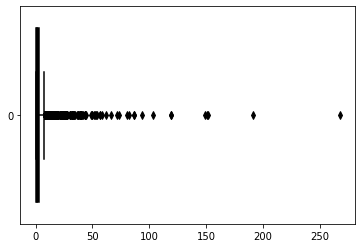

In [32]:
sns.boxplot(data = df_product["FullPriceUnits"],color = 'black',orient = "h",fliersize = 5)

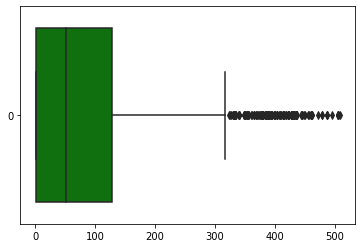

In [33]:
sns.boxplot(data = df_product["ProductMaxDaysToSellInFullPrice"],color = 'green',orient = "h",fliersize = 5)

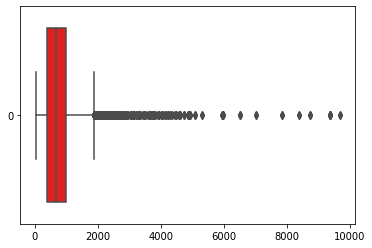

In [34]:
sns.boxplot(data = df_product["ProductOriginalUnitPriceGBP"],orient = 'h',color = 'red',fliersize = 5)

From all the three box plots it is clear that there is variablity in the data set and their are lot of outliers in the data set. To deal with these outliers we have to perform the scaling of features.   
#### Reasons for Scaling
1) First reason is outliers, we have to bring all the outliers in the range.   
2) Second reason is data set contains features with some very high magnitudes such as in ProductOriginalUnitPriceGBP max value is 9688 and min value is 25 similarly in other columns also their is very high difference in magnitudes.  

If a feature in the dataset is big in scale compared to others then in algorithms this big scaled feature becomes dominating and needs to be normalized.

#### Feature Scaling 

We will use MinMax Scaler it is a Normalization technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.

Formula for this is   
$X' = X - min(X) / min(X) - max(X)$

In [35]:
mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_test = mmsc.transform(X_test)

#### Training our data using Random Forest Algorithm

#### Applying Random forest Alogorithm and cross validation for finding the best hyper parameter

we would be creating a grid of parameters for this and see which parameter is best.

In [36]:
# creating a parameter grid for cross validation and hyper parameter tuning
param_grid = {
    'max_depth': [80, 90, 100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150,250]
}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [37]:
# finding the best parameter from our cross validation
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


{'max_depth': 90,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [38]:
# we are creating model out of the best grid generated by the cross validation
best_grid = grid_search.best_estimator_

In [39]:
# predicting the values using X_test data set
y_pred = best_grid.predict(X_test)

In [40]:
# predicting with the train set
y_pred_train = best_grid.predict(X_train)
# Calculating the metrics for our model performance
print('Mean Absolute Error with train set:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error with train set:', metrics.mean_squared_error(y_train, y_pred_train))
print('R2 score with train set:',metrics.r2_score(y_train, y_pred_train))
print('Root Mean Squared Error with train set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error with train set: 0.006404262888670876
Mean Squared Error with train set: 0.016564805695168803
R2 score with train set: 0.830921923452178
Root Mean Squared Error with train set: 0.12870433440707738


#### Evaluating Random Forest

In [41]:
# Calculating the metrics for our model performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:',metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.005821797805883346
Mean Squared Error: 0.00618274795345484
R2 score: 0.8634095883157983
Root Mean Squared Error: 0.07863045182023845


model’s R-squared is 85%, the variance of its errors is 85% less than the variance of the dependent variable and the standard deviation of its errors is 86% less than the standard deviation of the dependent variable. 
MSE and RMSE punish larger errors more than smaller errors, inflating or magnifying the mean error score. This is due to the square of the error value. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error.

#### Predicting from Random Forest model

In [42]:
df = pd.DataFrame({'Product Number':X_test_product_number,'Rate of Sales Real Values':y_test.reshape(-1), 'Rate of Sales Predicted Values':y_pred.reshape(-1)})

In [43]:
df.head(5)

,Product Number,Rate of Sales Real Values,Rate of Sales Predicted Values
985,1343,0.000000,0.000000
5296,1907,0.053254,0.052665
5285,1902,0.250000,0.270208
5726,2070,0.005682,0.005675
3424,1005,0.100000,0.100000


#### Feature Selection

Feature: ProductNumber, Score: 0.00039
Feature: ProductGroup, Score: 0.00039
Feature: ProductCategory, Score: 0.00692
Feature: ProductOriginalUnitPriceGBP, Score: 0.00220
Feature: ProductMaxDaysToSellInFullPrice, Score: 0.66362
Feature: Season, Score: 0.00000
Feature: FullPriceUnits, Score: 0.32499
Feature: ProductSize_1, Score: 0.00000
Feature: ProductSize_2, Score: 0.00078
Feature: ProductSize_3, Score: 0.00006
Feature: ProductSize_4, Score: 0.00037
Feature: ProductSize_5, Score: 0.00001
Feature: ProductSize_6, Score: 0.00021
Feature: ProductSize_7, Score: 0.00002
Feature: ProductSize_8, Score: 0.00002


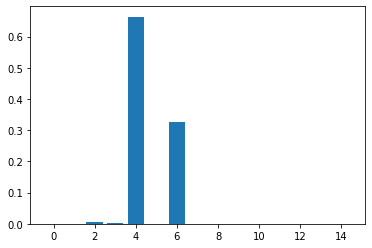

In [44]:
# Finding the important feature from the model
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (col[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

From the above plot and values it is clear that $ProductMaxDaysToSellInFullPrice$ plays very important role in deciding the rates of sales next important feature is $FullPriceUnit$ which is quiet obvious since th formula for    
$ rate of sales :FullPriceUnit/ProductMaxDaysToSellInFullPrice $

#### Applying Linear regression

In [45]:
# Applying Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_lr = model.predict(X_test)

In [46]:
# pridicting with train set
y_pred_lr_train = model.predict(X_train)
print('Mean Absolute Error Linear Regression with train set:', metrics.mean_absolute_error(y_train, y_pred_lr_train))
print('Mean Squared Error Linear Regression with train set:', metrics.mean_squared_error(y_train, y_pred_lr_train))
print('R2 score Regression with train set:',metrics.r2_score(y_train, y_pred_lr_train))
print('Root Mean Squared Error Linear Regression with train set:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr_train)))

Mean Absolute Error Linear Regression with train set: 0.07374495472222384
Mean Squared Error Linear Regression with train set: 0.08893425995678036
R2 score Regression with train set: 0.09224207700293319
Root Mean Squared Error Linear Regression with train set: 0.29821847688696346


#### Evaluating Linear Regression

In [47]:
print('Mean Absolute Error Linear Regression:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Mean Squared Error Linear Regression:', metrics.mean_squared_error(y_test, y_pred_lr))
print('R2 score Regression:',metrics.r2_score(y_test, y_pred_lr))
print('Root Mean Squared Error Linear Regression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

Mean Absolute Error Linear Regression: 0.0678044232970525
Mean Squared Error Linear Regression: 0.03849795473542309
R2 score Regression: 0.14949606131479953
Root Mean Squared Error Linear Regression: 0.19620895681752934


#### Predicting from Linear Regression Model

In [48]:
df_lr = pd.DataFrame({'Product Number':X_test_product_number,'Rate of Sales Real Values':y_test.reshape(-1), 'Rate of Sales Predicted Values':y_pred.reshape(-1)})

In [49]:
df_lr.head(5)

,Product Number,Rate of Sales Real Values,Rate of Sales Predicted Values
985,1343,0.000000,0.000000
5296,1907,0.053254,0.052665
5285,1902,0.250000,0.270208
5726,2070,0.005682,0.005675
3424,1005,0.100000,0.100000


#### Conclusion

I have used two algorithm Random Forest and Linear Regression algorithm. Acording to the performance metrics r square for random forest is more than Linear Regression and also error metrics that we have used is good with Random Forest.   
With the given data set Random Forest will perform better then Linear Regression to predict Rate of Sales of the items.  
I have calculated the metrics with train set also to check for any overfitting but with the result model seems perfect.